In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
np.random.exponential?

Docstring:
exponential(scale=1.0, size=None)

Draw samples from an exponential distribution.

Its probability density function is

.. math:: f(x; \frac{1}{\beta}) = \frac{1}{\beta} \exp(-\frac{x}{\beta}),

for ``x > 0`` and 0 elsewhere. :math:`\beta` is the scale parameter,
which is the inverse of the rate parameter :math:`\lambda = 1/\beta`.
The rate parameter is an alternative, widely used parameterization
of the exponential distribution [3]_.

The exponential distribution is a continuous analogue of the
geometric distribution.  It describes many common situations, such as
the size of raindrops measured over many rainstorms [1]_, or the time
between page requests to Wikipedia [2]_.

.. note::
    New code should use the ``exponential`` method of a ``default_rng()``
    instance instead; please see the :ref:`random-quick-start`.

Parameters
----------
scale : float or array_like of floats
    The scale parameter, :math:`\beta = 1/\lambda`. Must be
    non-negative.
size : int or tuple

$$
f(x; \frac{1}{\beta}) = \frac{1}{\beta} \exp(-\frac{x}{\beta})
$$

## __Step 0: Initialize the Population Distribution__

In [4]:
## The true population distribution is $X \sim Exp(\beta)$ 

β = 5.0

In [5]:
## Set the sample size

n = 50

In [6]:
## Generate the sample of data

x = np.random.exponential(scale = β, size=n)

## __Step 1: The Statistician Gets Her Data__

In [7]:
x̄ = np.mean(x)

In [8]:
x̄

4.991676711680743

In [9]:
## Set her confidence coefficient

α = 0.05

In [10]:
t_crit = stats.t(n-1).ppf(1.0 - α / 2.)

In [11]:
t_crit

2.009575234489209

In [12]:
s = np.std(x, ddof=1)

In [13]:
lb = x̄ - t_crit * s / np.sqrt(n)
ub = x̄ + t_crit * s / np.sqrt(n)

In [14]:
lb, ub

(3.72279900787506, 6.260554415486426)

## __Monte Carlo Simulation__

In [15]:
np.random.seed(12345)

In [16]:
## Monte Carlo repititions

M = 5_000_000

## Set the sample size

n = 5000

In [17]:
## Set up containers

xbars = np.zeros(M)
#s = np.zeros(M)

## The main simulation loop

for m in range(M):
    x = np.random.exponential(scale=β, size=n)
    xbars[m] = np.mean(x)
    #s[m] = np.std(x, ddof=1)

In [18]:
xbars

array([4.94251951, 5.14770624, 5.00745038, ..., 5.11872048, 5.0107114 ,
       5.07922384])

In [19]:
(xbars.mean(), xbars.std(ddof=1))

(5.000012199762452, 0.07072246880560419)

In [20]:
xbars.sort()

In [21]:
xbars[:10]

array([4.64772677, 4.6632009 , 4.66872533, 4.67059234, 4.6718699 ,
       4.67960442, 4.68027503, 4.68116556, 4.68304328, 4.68483002])

In [22]:
xbars[-10:]

array([5.340674  , 5.34101284, 5.3415053 , 5.34181147, 5.34316618,
       5.34501877, 5.35653671, 5.36148024, 5.36180713, 5.40256336])

In [23]:
xbars_s = pd.Series(xbars)

<AxesSubplot:ylabel='Density'>

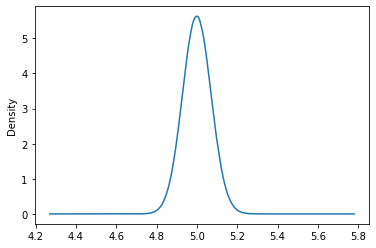

In [24]:
xbars_s.plot.kde()

In [25]:
z = (xbars - β) / np.std(xbars, ddof=1)

In [26]:
(z.mean(), z.std(ddof=1))

(0.00017250193112618216, 1.0000000000000002)

In [27]:
int(α / 2.0 * M)

125000

In [28]:
lo = int((α / 2.0) * M) 
hi = int((1 - α/2) * M) 

In [29]:
z[lo]

-1.946162773761331

In [30]:
z[lo], z[hi]

(-1.946162773761331, 1.9737380543311869)

In [31]:
ci_l = x̄ - z[lo] * s / np.sqrt(n)
ci_u = x̄ + z[hi] * s / np.sqrt(n)